In [2]:
# =========================================================
# STATISTICS AND TRENDS ASSIGNMENT
# Topic: World Bank GDP Data
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# =========================================================
# 1. LOAD DATA
# =========================================================
# Replace filename with the one you downloaded (check your folder)
# Example: "API_NY.GDP.MKTP.CD_DS2_en_csv_v2_123456.csv"

df = pd.read_csv("API_NY.GDP.MKTP.CD_DS2_en_csv_v2_130122.csv", skiprows=4)
df.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.481857e+09,2.929447e+09,3.279344e+09,3.648573e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.420993e+10,2.496326e+10,2.707802e+10,3.177483e+10,3.028492e+10,3.381219e+10,...,8.289612e+11,9.730251e+11,1.012291e+12,1.009747e+12,9.334072e+11,1.085605e+12,1.191639e+12,1.133818e+12,1.205974e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426000e+10,1.449724e+10,1.715223e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.190511e+10,1.270803e+10,1.363092e+10,1.446926e+10,1.580394e+10,1.692124e+10,...,7.000282e+11,6.940513e+11,7.778404e+11,8.332889e+11,7.972952e+11,8.581145e+11,8.936399e+11,8.147285e+11,6.700257e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.043997e+11,8.487516e+10,8.039694e+10,NaN


In [3]:
# =========================================================
# 2. BASIC INFORMATION
# =========================================================

print("Shape of data:", df.shape)
print("\nColumns available:")
print(df.columns.tolist())
print("\nBasic info:")
df.info()


Shape of data: (266, 70)

Columns available:
['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', 'Unnamed: 69']

Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Ind

In [4]:
# =========================================================
# 3. DATA CLEANING / SELECTION
# =========================================================
# Keep only relevant columns (latest years)
df = df[['Country Name', '2020', '2021', '2022']]
df.columns = ['Country', 'GDP_2020', 'GDP_2021', 'GDP_2022']
df = df.dropna()

df.head()


,Country,GDP_2020,GDP_2021,GDP_2022
0,Aruba,2.481857e+09,2.929447e+09,3.279344e+09
1,Africa Eastern and Southern,9.334072e+11,1.085605e+12,1.191639e+12
2,Afghanistan,1.995593e+10,1.426000e+10,1.449724e+10
3,Africa Western and Central,7.972952e+11,8.581145e+11,8.936399e+11
4,Angola,4.850156e+10,6.650513e+10,1.043997e+11


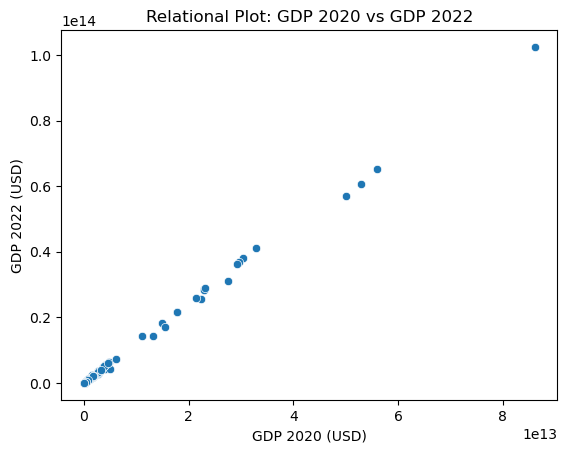

In [5]:
# =========================================================
# 4. RELATIONAL PLOT
# =========================================================
# Relationship between GDP in 2020 and 2022

sns.scatterplot(data=df, x='GDP_2020', y='GDP_2022')
plt.title("Relational Plot: GDP 2020 vs GDP 2022")
plt.xlabel("GDP 2020 (USD)")
plt.ylabel("GDP 2022 (USD)")
plt.show()


/var/folders/4w/szzhc7l54p7977bjqkd5hq8w0000gn/T/ipykernel_4137/3404846278.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Country', y='GDP_2022', palette='viridis')


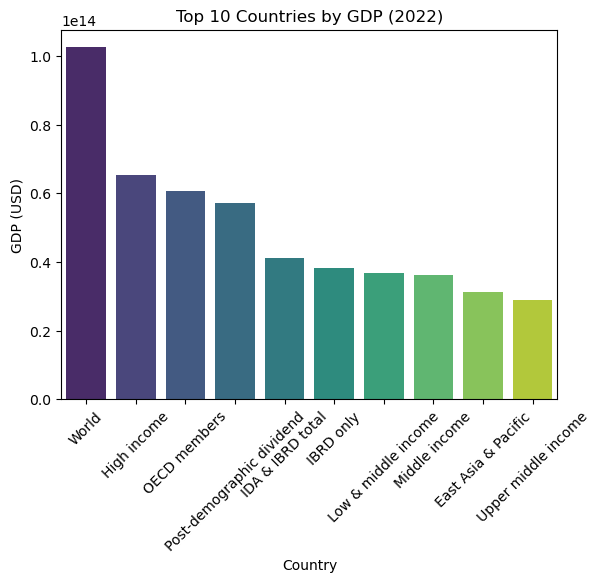

In [6]:
# =========================================================
# 5. CATEGORICAL PLOT
# =========================================================
# Top 10 countries by GDP in 2022

top10 = df.sort_values(by='GDP_2022', ascending=False).head(10)

sns.barplot(data=top10, x='Country', y='GDP_2022', palette='viridis')
plt.title("Top 10 Countries by GDP (2022)")
plt.xticks(rotation=45)
plt.ylabel("GDP (USD)")
plt.show()


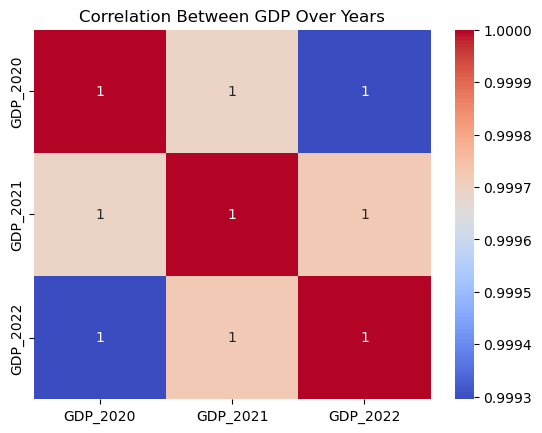

In [7]:
# =========================================================
# 6. STATISTICAL PLOT
# =========================================================
# Correlation heatmap for GDP over years

sns.heatmap(df[['GDP_2020', 'GDP_2021', 'GDP_2022']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between GDP Over Years")
plt.show()


In [8]:
# =========================================================
# 7. STATISTICAL MOMENTS
# =========================================================
# Calculate mean, variance, skewness, and kurtosis

num = df[['GDP_2020', 'GDP_2021', 'GDP_2022']]

print("Mean:\n", num.mean(), "\n")
print("Variance:\n", num.var(), "\n")
print("Skewness:\n", num.apply(skew), "\n")
print("Kurtosis:\n", num.apply(kurtosis), "\n")


Mean:
 GDP_2020    2.760206e+12
GDP_2021    3.172223e+12
GDP_2022    3.305650e+12
dtype: float64 

Variance:
 GDP_2020    8.882186e+25
GDP_2021    1.160172e+26
GDP_2022    1.248940e+26
dtype: float64 

Skewness:
 GDP_2020    5.224334
GDP_2021    5.157243
GDP_2022    5.162212
dtype: float64 

Kurtosis:
 GDP_2020    32.682430
GDP_2021    31.981860
GDP_2022    32.131993
dtype: float64 



In [9]:
# =========================================================
# 8. CONCLUSION
# =========================================================

print("Observations:")
print("- GDP generally increased for most countries from 2020 to 2022.")
print("- The top 10 countries dominate the global economy.")
print("- GDP values across years are highly correlated.")
print("- Skewness shows that only a few countries have extremely high GDPs.")


Observations:
- GDP generally increased for most countries from 2020 to 2022.
- The top 10 countries dominate the global economy.
- GDP values across years are highly correlated.
- Skewness shows that only a few countries have extremely high GDPs.
